# Network classifier notebook
For implementing new ideas!

In [1]:
import numpy as np

# Basic script to run network state classfication

from loadSeizureData  import LoadSeizureData
from classifierTester import ClassifierTester
from basicFeatures    import BasicFeatures
from randomForestClassifier import RandomForest
from freqfeatures     import FreqFeatures

dirpath = '/Users/Jonathan/Documents/PhD /Seizure_related/Network_states/VMData/Classified'


dataobj = LoadSeizureData(dirpath)
dataobj.load_data()

basicStatsExtractor = BasicFeatures()
freqextractor = FreqFeatures()
dataobj.extract_feature_array([basicStatsExtractor])
#dataobj.extract_feature_array([freqextractor])

rf = RandomForest(no_trees = 100)
classtester = ClassifierTester(dataobj.features,np.ravel(dataobj.label_colarray), training_test_split = 80)
(score, predictedlabelsprobs, reallabels) = classtester.test_classifier(rf)
print 'training a random forest classifier!'
print score, 'percent correct!'


training a random forest classifier!
81.9672131148 percent correct!


## Understanding the feature dataset
1. scatter plot matrix
2. pca projection
3. Correct labels!

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from pandas.tools.plotting import radviz
from pandas.tools.plotting import scatter_matrix
import pandas as pd
df = pd.DataFrame(dataobj.features, columns = ['kurtosis','skew','coastline'])
#df = pd.DataFrame(dataobj.features)

In [7]:
df.shape

(301, 3)

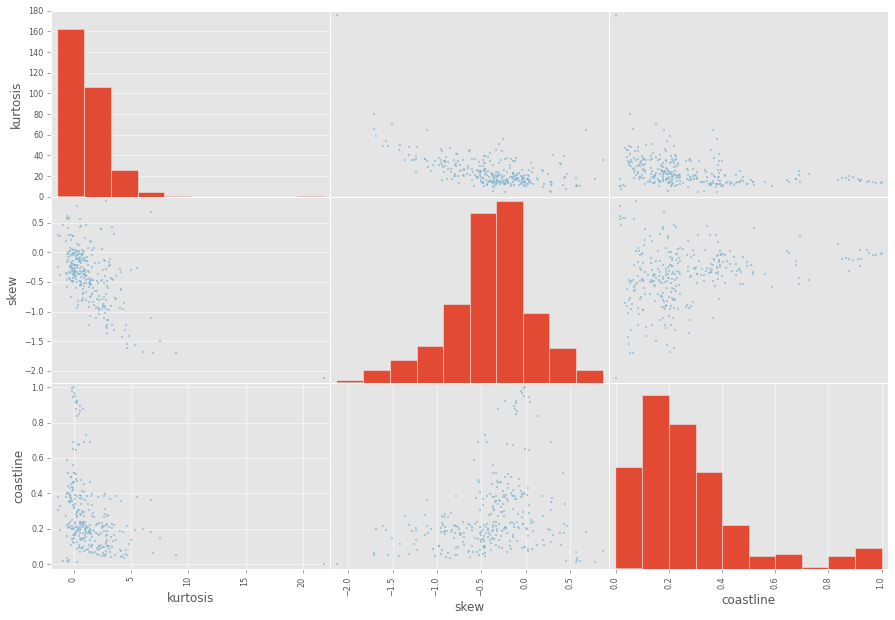

In [8]:
scatter_matrix(df,figsize = (15,10));
plt.savefig('scattermatrixnonorm.png')

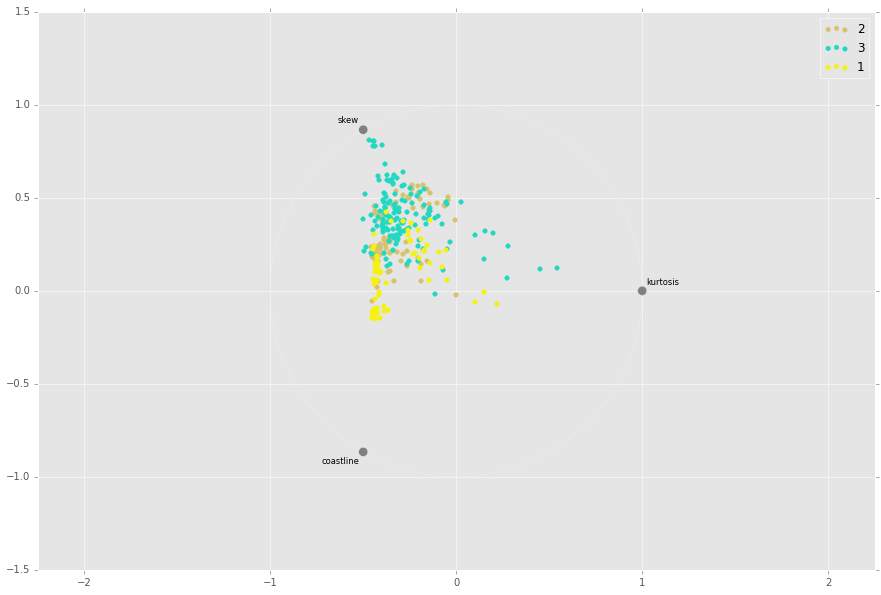

In [9]:
plt.figure(figsize = (15,10))
df['labels'] = dataobj.label_colarray
radviz(df,'labels')
plt.savefig('radviz.png')

In [ ]:
np.fft.fft()